# Ajuste de Curvas por 4 métodos distintos

Vector creado por mínimos cuadrados:
[  1.28402613e-04  -3.26768680e-03   1.72114130e-02   4.88215435e-02
   3.90875409e+00]

Vector función polyfit:
[  1.28402613e-04  -3.26768680e-03   1.72114130e-02   4.88215435e-02
   3.90875409e+00]

Vector función polinomialpolyfit
[  1.28402613e-04  -3.26768680e-03   1.72114130e-02   4.88215435e-02
   3.90875409e+00]

Vector creado por forzar coeficientes
[  1.28402613e-04  -3.26768680e-03   1.72114130e-02   4.88215435e-02
   3.90875409e+00]



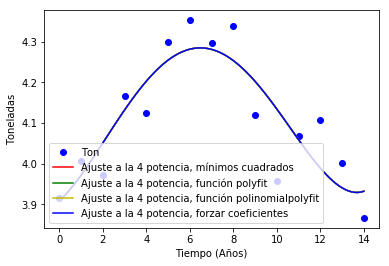

In [397]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as P

#Regresión polinomial

#Datos
#Años desde el 2000
t=np.linspace(2000-2000,2014-2000,15)

#Emisiones de Dióxido de Carbono (toneladas métricas per cápita) desde el año 2000
Ton=np.array([3.916478182, 4.006881616, 3.970934988, 4.16704652, 4.124551403, 4.299365235, 4.353173578, 4.296635487, 4.339644436, 4.120600766, 3.957657664, 4.067755192, 4.107686314, 4.001602493, 3.866241113])

#t = np.array([2.53240, 1.91110, 1.18430, 0.95784, 0.33158,-0.19506, -0.82144, -1.64770, -1.87450, -2.2010])

#Ton = np.array([-2.50400, -1.62600, -1.17600, -0.87400, -0.64900,-0.477000, -0.33400, -0.20600, -0.10100, -0.00600])

#Características del polinomio: 
#Orden de polinomio
n=4

#
##
###
#Prueba de mínimos cuadrádos:

#Creación de matriz X
z=(n+1,n+1)
X=np.zeros(z)
for j in range(0,n+1):
    for i in range(0,n+1):
        X[i][j]=(np.sum(t**(i+j)))

#Creación de vector columna Y 
z=(n+1,1)
y=np.zeros(z)
for j in range(0,n+1):
    y[j][0]=np.sum((Ton*t**j))

a=np.linalg.solve(X,y)
a=a.transpose()[0][::-1] #Este comando lo transpone, despues toma el valor de la primera fila y lo invierte

#
##
###
#Forzar coeficientes

#Creación de matriz X [d x (m+1)]
d=len(t)
z=(d,n+1)
X=np.zeros(z)
for j in range(0,n+1):
    for i in range(0,d):
          X[i][j]=(t[i])**j
    
#Creación del vector "y"
z=(d,1)
y=np.zeros(z)
for i in range(0,d):
    y[i][0]=Ton[i]

#Proceso para poder obtener el vector "a" deseado 
#Transponer X de ambos lados, y solucionar 
XT=np.matrix.transpose(X)
XT_Y=np.matmul(XT,y)
XT_X=np.matmul(XT,X)
b=np.linalg.solve(XT_X,XT_Y)
b=b.transpose()[0][::-1]

#
##
###
#Metodo de python numpy polifit:

A=np.polyfit(t,Ton,n)

#
##
###
#Metodo de python numpy polinomial polifit:

Q=P.polyfit(t,Ton,n)
Q=Q[::-1]


#Resultados: 

print ("Vector creado por mínimos cuadrados:")
print (a)
print("")
print ("Vector función polyfit:")
print (A)
print("")
print ("Vector función polinomialpolyfit")
print (Q)
print("")
print ("Vector creado por forzar coeficientes")
print (b)
print("")


#Para crear las funciones: 

#Inicializar las variables: 
x=np.linspace(t.min(), t.max(),100)
func1=x*0
func2=x*0
func3=x*0
func4=x*0

#Creacion de las funciones
for i in range(0,n+1):
    func1+=a[i]*x**(n-i)
    func2+=A[i]*x**(n-i)
    func3+=Q[i]*x**(n-i)
    func4+=b[i]*x**(n-i)


#Graficar
plt.plot(t, Ton,   'ob' ,label='Ton')
plt.plot(x, func1 , 'r' ,label='Ajuste a la %d potencia, mínimos cuadrados' %n)
plt.plot(x, func2 , 'g' ,label='Ajuste a la %d potencia, función polyfit' %n)
plt.plot(x, func3 , 'y' ,label='Ajuste a la %d potencia, función polinomialpolyfit' %n)
plt.plot(x, func4 , 'b', label='Ajuste a la %d potencia, forzar coeficientes' %n)
plt.legend(loc='best')
plt.xlabel("Tiempo (Años)")
plt.ylabel("Toneladas")
plt.show()
